<font color='magenta' size='5'><b>Welcome to the Machine Learning Assignment!</b></font>


## Objective
This assignment is designed to give you practical experience with a complete machine learning workflow, applying 10-fold cross validation, and running classification models on a prepared dataset.

## Dataset Overview
You are provided with a dataset already split into training and test sets. Use the training set for developing and validating your models, and the test set for final evaluation. 

## Brief information about the dataset 
This dataset contains data from a higher education institution on various variables related to undergraduate students, including demographics, social-economic factors, and academic performance, to investigate the impact of these factors on student dropout.



## Task 1: Data Loading (2 mark)
Import necessary libraries and load the training and test datasets. Show the first five rows of each dataset to confirm loading, and use the info() method to review the details of the columns in each dataset. Look for any missing values.

In [2]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

seed = (123)


In [3]:
# # Load the datasets
test_data = pd.read_csv('test_data.csv')
train_data = pd.read_csv('train_data.csv')

## Show the first five entries from both the training and testing datasets,
test_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,4,1,9,1,2,1,3,27,3,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,0
1,1,8,1,9,1,1,1,13,27,6,...,0,5,13,1,11.000000,0,9.4,-0.8,-3.12,0
2,1,8,3,12,1,1,1,3,3,10,...,0,8,9,8,14.444444,0,13.9,-0.3,0.79,1
3,1,8,1,12,1,1,1,1,27,10,...,0,8,8,8,15.075000,0,13.9,-0.3,0.79,1
4,5,12,1,4,1,1,1,1,1,5,...,0,6,7,0,0.000000,0,8.9,1.4,3.51,0


In [4]:
train_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,2,12,1,1,1,1,14,3,...,0,8,8,8,14.231250,0,11.1,0.6,2.02,1
1,1,1,1,12,1,1,1,1,14,10,...,0,8,9,7,14.178571,0,11.1,0.6,2.02,1
2,1,8,2,16,1,1,1,1,14,6,...,0,7,7,7,13.142857,0,12.4,0.5,1.79,1
3,1,12,1,4,1,1,1,22,27,10,...,3,12,22,9,12.700000,0,15.5,2.8,-4.06,1
4,1,1,6,12,1,1,1,23,14,8,...,0,8,8,7,13.798571,0,10.8,1.4,1.74,1


In [5]:
## Use the info() method to review the details of the columns in each dataset.
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  908 non-null    int64  
 1   Application mode                                908 non-null    int64  
 2   Application order                               908 non-null    int64  
 3   Course                                          908 non-null    int64  
 4   Daytime/evening attendance                      908 non-null    int64  
 5   Previous qualification                          908 non-null    int64  
 6   Nacionality                                     908 non-null    int64  
 7   Mother's qualification                          908 non-null    int64  
 8   Father's qualification                          908 non-null    int64  
 9   Mother's occupation                        

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2722 entries, 0 to 2721
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  2722 non-null   int64  
 1   Application mode                                2722 non-null   int64  
 2   Application order                               2722 non-null   int64  
 3   Course                                          2722 non-null   int64  
 4   Daytime/evening attendance                      2722 non-null   int64  
 5   Previous qualification                          2722 non-null   int64  
 6   Nacionality                                     2722 non-null   int64  
 7   Mother's qualification                          2722 non-null   int64  
 8   Father's qualification                          2722 non-null   int64  
 9   Mother's occupation                      

In [7]:
## Are there any missing values
test_data.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [8]:
train_data.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

There are no nas.

## Task 2: Separate Data and Labels (1 mark)
Separate features and target labels for both training and test datasets.

Last column "Target" has the labels for both training and test data. 

Label 1= Graduate and Label 0 = Dropout



In [9]:
test_x = test_data.drop('Target', axis=1)
test_y = test_data['Target']

train_x = train_data.drop('Target', axis=1)
train_y = train_data['Target']

## Task 3: Standardize the data (1 mark)


In [12]:
#Standardise the data
# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the test_data
test_x_standardized = scaler.fit_transform(test_x)

# Standardize the train_data
train_x_standardized = scaler.fit_transform(train_x)


## Task 4: Model Implementation and Hyperparameter Tuning
Develop at least two different classification models. 


### Part A: First Classification Model (2 marks)

Model Implementation (1 mark): Implement your first classification model using any set of initial hyperparameters. Explain your choice of model and the initial parameters you selected.

Parameter Tuning (1 mark): Apply cross-validation to tune the parameters. 


The first model implemented is an Xgboost classifier, as these tend to perform strongly for classification tasks. The hyperparameters chosen are the defaults build into the package, as they are included as defaults for a reason and tend to perform strongly.

In [17]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(train_x_standardized, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [36]:
param_grid = {
    'max_depth': [3, 5],
    'min_child_weight': [1, 2, 4],
    'learning_rate': [ 0.05, 0.1, 0.2],
    'n_estimators': [50, 175, 200],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.6,1]
}
# Initialize GridSearchCV and fit to find the best parameters
grid_search = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=10, verbose=1)
grid_search.fit(train_x_standardized, train_y)
# Print best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 175, 'subsample': 0.7}


In [37]:
# Re-train the model with the best parameters on the full training set
xgb_optimized = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_optimized.fit(train_x_standardized, train_y)

# Make predictions on the test set
y_pred_optimized = xgb_optimized.predict(test_x_standardized)

# Calculate and print the accuracy on the test set
accuracy_optimized = accuracy_score(test_y, y_pred_optimized)
print("Test set accuracy with optimized parameters: {:.2f}%".format(accuracy_optimized * 100))

Test set accuracy with optimized parameters: 87.44%


### Part B: Second Classification Model (2 marks)

Model Implementation (1 mark): Implement your second classification model with a different set of initial hyperparameters. Provide a rationale for your choice of model and the parameters.

Parameter Tuning (1 mark): Use cross-validation to refine the parameters.

I chose next to do a logistic regression, taking the same rough range we have used for regularization parameters previoously in labs as the reference point. I choose logistic because while straightforward it can be very good at classification with minimal tuning needed.

In [38]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

#Make a parameter grid between 0.01 and 1 very granular

param_grid = {
    'C': np.logspace(-3, 2, 10),  # Regularization strength
}

# Step 3: Instantiate logistic regression model
logreg_model = LogisticRegression()

# Step 4: Hyperparameter tuning with cross-validation (grid search)
grid_search = GridSearchCV(logreg_model, param_grid, cv=10)
grid_search.fit(train_x_standardized, train_y)

# Step 5: Find best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.1668100537200059}


In [39]:
logregoptimised = LogisticRegression(**best_params)

# Step 6: Train the model with the best parameters on the full training set
logregoptimised.fit(train_x_standardized, train_y)

# Step 7: Make predictions on the test set
y_pred_logreg = logregoptimised.predict(test_x_standardized)

# Step 8: Calculate and print the accuracy on the test set
accuracy_logreg = accuracy_score(test_y, y_pred_logreg)
print("Test set accuracy with optimized parameters: {:.2f}%".format(accuracy_logreg * 100))

Test set accuracy with optimized parameters: 90.09%


## Task 5: Summarize the comparison of the two models in terms of accuracy and confusion matrices(1 mark). Plot the ROC-AUC Curve (1 mark).

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix

#the confusion matrix for the two models
cmlogreg = confusion_matrix(test_y, y_pred_logreg)

# Compute confusion matrix for model 2
cmxgb = confusion_matrix(test_y, y_pred_optimized)


#Print Accuracies
accuracy_logreg = accuracy_score(test_y, y_pred_logreg)
print("Accuracy for Logistic Regression: {:.2f}%".format(accuracy_logreg * 100))
accuracy_xgb = accuracy_score(test_y, y_pred_optimized)
print("Accuracy for XGBoost: {:.2f}%".format(accuracy_xgb * 100))

# Print confusion matrices
print("Confusion matrix for Logistic Regression:")
print(cmlogreg)
print("\nConfusion matrix for XGBoost:")
print(cmxgb)

Accuracy for Logistic Regression: 90.09%
Accuracy for XGBoost: 87.44%
Confusion matrix for Logistic Regression:
[[281  51]
 [ 39 537]]

Confusion matrix for XGBoost:
[[283  49]
 [ 65 511]]


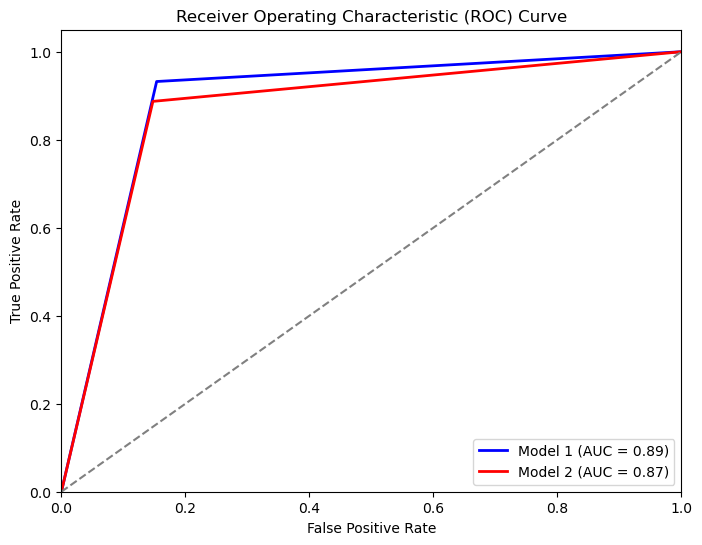

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr1, tpr1, _ = roc_curve(test_y, y_pred_logreg)
roc_auc1 = auc(fpr1, tpr1)

# Compute ROC curve and AUC for Model 2
fpr2, tpr2, _ = roc_curve(test_y, y_pred_optimized)
roc_auc2 = auc(fpr2, tpr2)

# Plot ROC curves for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label='Model 1 (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='Model 2 (AUC = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Task 6: Calculate feature importances using a model of your choice. What are the best five features? (2 marks)

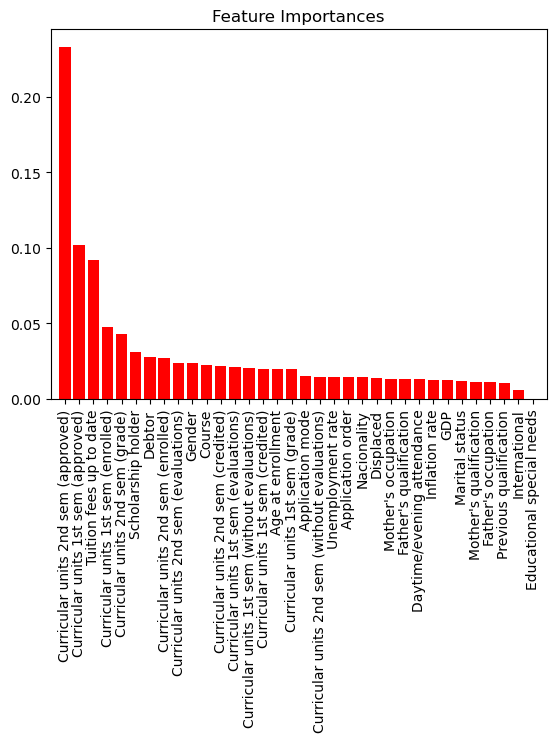

Top 5 importances:
Curricular units 2nd sem (approved): 0.23288396000862122
Curricular units 1st sem (approved): 0.10163169354200363
Tuition fees up to date: 0.09187652915716171
Curricular units 1st sem (enrolled): 0.04764305800199509
Curricular units 2nd sem (grade): 0.04330149665474892


In [47]:
importances = xgb_optimized.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title('Feature Importances')
plt.bar(range(train_x.shape[1]), importances[indices], color='r', align='center')
plt.xticks(range(train_x.shape[1]), train_x.columns[indices], rotation=90)
plt.xlim([-1, train_x.shape[1]])
plt.show()

top_5_indices = indices[:5]
top_5_importances = importances[top_5_indices]
top_5_features = train_x.columns[indices][:5]

print("Top 5 importances:")
for feature, importance in zip(top_5_features, top_5_importances):
    print(f"{feature}: {importance}")

## Task 7: Friendly Competition for Highest Accuracy (3 marks)

Let's make this interesting! Participate in a friendly competition with your classmates to achieve the highest accuracy on the test set. To add a little extra fun, we will maintain a leaderboard on the classroom whiteboard, updating it regularly to showcase the top performances. 

This is a great opportunity to learn from each other, push your skills to the limit, and maybe even earn some bragging rights!

Best of luck, and let’s see what you can achieve!


In [52]:

accuracy_logreg = accuracy_score(test_y, y_pred_logreg)
print("Accuracy for Logistic Regression: {:.2f}%".format(accuracy_logreg * 100))


#print("Test set accuracy for the chosen model:", accuracy_score(test_y, y_pred_logreg)) # y_pred has the test labels predicted by your model



Accuracy for Logistic Regression: 90.09%


Ignore this below, was an attempt:

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.kernel_ridge import KernelRidge
import numpy as np


param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': [0.1, 1.0]  # Kernel coefficient for 'rbf' kernel
}

# Step 4: Define the KernelRidge classifier
kernel_ridge_classifier = KernelRidge()

# Step 5: Perform hyperparameter tuning with cross-validation using GridSearchCV
grid_search = GridSearchCV(kernel_ridge_classifier, param_grid, cv=10)
grid_search.fit(train_x_standardized, train_y)

# Step 6: Find best parameters and best cross-validation score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
        

# Step 5: Train the model with the best parameter values on the full training set
kernel_ridge_classifier = KernelRidge(**best_params)
kernel_ridge_classifier.fit(train_x, train_y)


# Step 6: Make predictions on the test set
y_pred_kernreg = kernel_ridge_classifier.predict(test_x_standardized)

# Step 13: Get accuracy on the test set
accuracy = kernel_ridge_classifier.score(X_test, y_test)
print("Accuracy on test set:", accuracy)


[2.09195937e-20 1.36068895e-24 3.59846139e-22 1.05518541e-22
 2.44682310e-25 3.10071712e-22 9.47431882e-28 1.05589212e-24
 6.46407810e-23 2.94030762e-24 1.33322676e-24 2.03356123e-22
 1.73246370e-24 3.67325279e-24 1.06864880e-22 2.93491530e-28
 6.31378033e-22 7.32089536e-25 4.10617824e-23 6.22955654e-22
 1.25873645e-21 6.36217281e-22 1.09830195e-22 1.19079895e-21
 1.11479295e-23 2.21341736e-23 1.40124695e-17 1.53367384e-20
 3.43656672e-20 4.06005547e-24 1.52916669e-22 8.91790660e-23
 1.05463699e-20 3.44185685e-20 3.45043479e-18 5.66841431e-23
 5.57002148e-20 1.27052905e-24 1.28462325e-22 1.26015042e-22
 3.03490744e-30 6.36860680e-22 4.56228141e-23 4.50382699e-27
 4.57676074e-23 1.21650224e-26 1.79704182e-23 2.10876724e-24
 1.06562916e-23 3.00750171e-23 3.63267222e-25 9.13093466e-20
 8.62140236e-35 2.84089004e-23 1.12250069e-21 3.73347112e-27
 3.16117169e-21 6.76887919e-29 3.15199770e-25 2.28046937e-23
 1.24639648e-22 2.38843510e-25 1.25620276e-23 4.83279192e-23
 1.29752425e-20 3.353963

c:\Users\killi\anaconda3\envs\dsa2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KernelRidge was fitted with feature names
  warnings.warn(


NameError: name 'X_test' is not defined